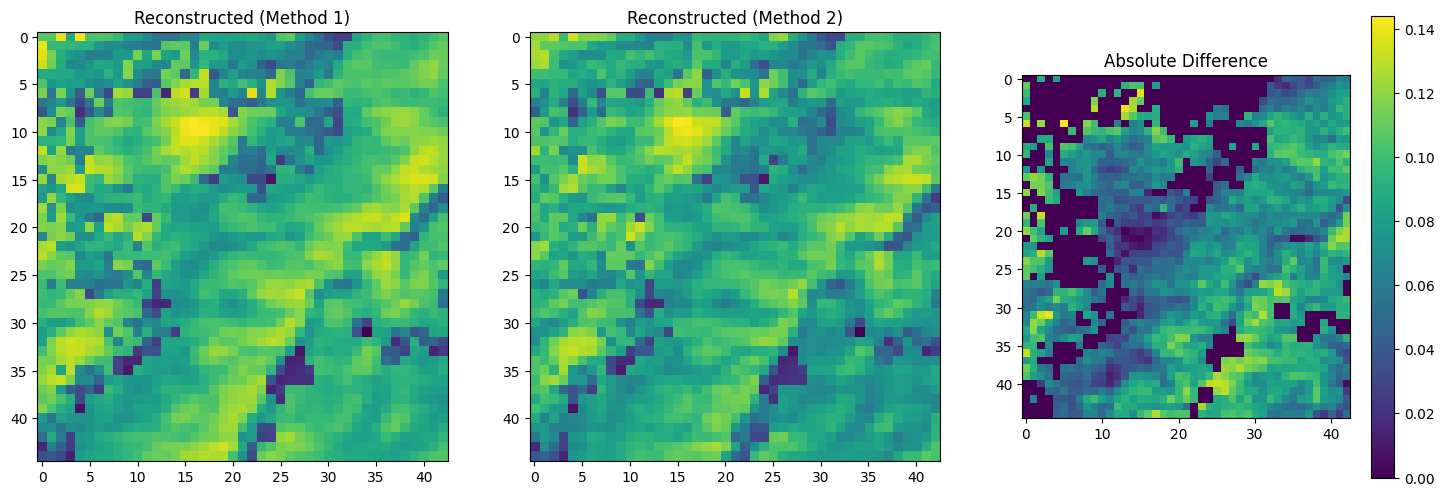

In [ ]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt

# Load the TIFF image stack
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'
original_image_stack = tifffile.imread(image_path)

# Choose a specific month to visualize (e.g., the first month, assuming the months are indexed from 0)
selected_month = 0  # 0 corresponds to the first month

# Method 1: Fill NaN values by taking the average of other months
method_1_image = np.copy(original_image_stack[:, :, selected_month])
nan_indices_method_1 = np.isnan(method_1_image)
average_values_method_1 = np.nanmean(original_image_stack[:, :, :], axis=2)
method_1_image[nan_indices_method_1] = average_values_method_1[nan_indices_method_1]

# Method 2: Fill NaN values by taking the average of the same month over 22 years
method_2_image = np.copy(original_image_stack)
nan_indices_method_2 = np.isnan(method_2_image[:, :, selected_month])
average_values_method_2 = np.nanmean(original_image_stack[:, :, selected_month::12], axis=2, keepdims=True)
method_2_image[:, :, selected_month][nan_indices_method_2] = average_values_method_2[nan_indices_method_2, 0]

# Calculate the absolute difference between the two reconstructed methods
difference_image = np.abs(method_1_image - method_2_image[:, :, selected_month])

# Plotting the reconstructed images and their difference
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overlay VI values on the reconstructed image using method 1
axes[0].imshow(method_1_image, cmap='viridis')
axes[0].set_title('Reconstructed (Method 1)')

# Overlay VI values on the reconstructed image using method 2
axes[1].imshow(method_2_image[:, :, selected_month], cmap='viridis')
axes[1].set_title('Reconstructed (Method 2)')

# Plot the absolute difference image
c = axes[2].imshow(difference_image, cmap='viridis')
axes[2].set_title('Absolute Difference')
plt.colorbar(c, ax=axes[2], orientation='vertical')

plt.show()


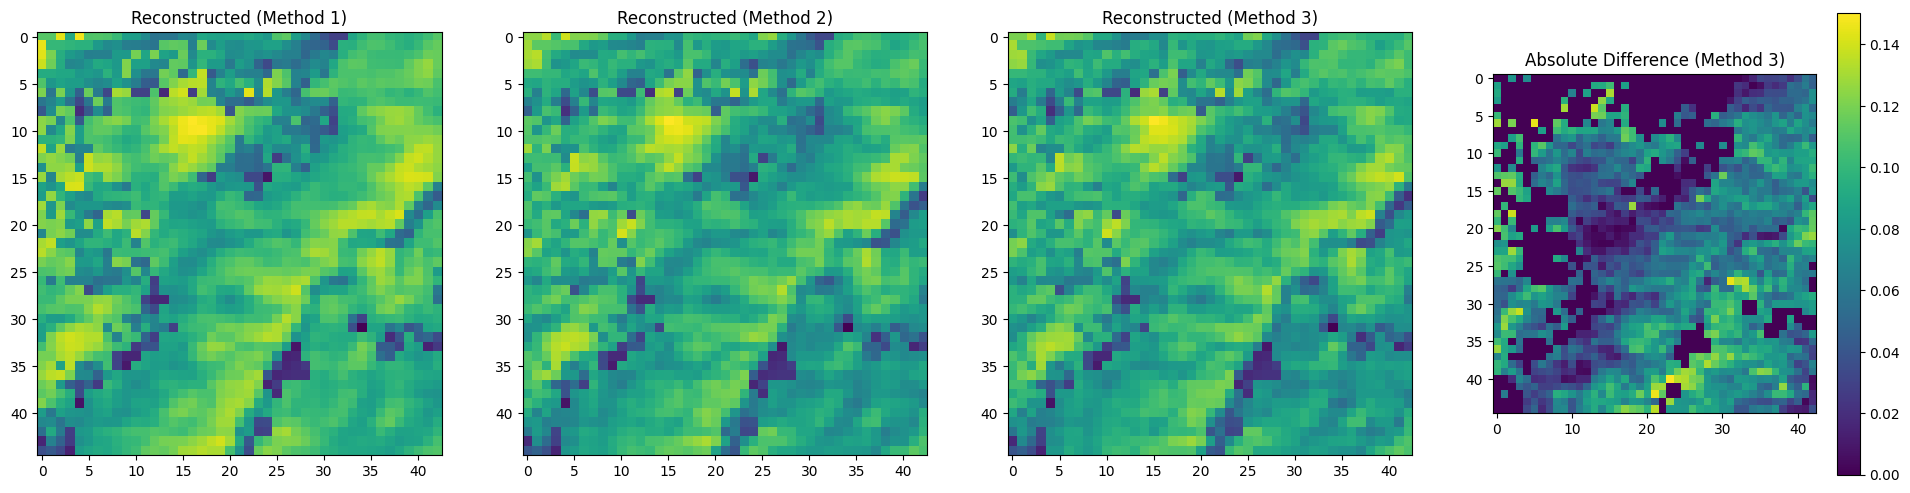

In [ ]:
# Method 3: Fill NaN values by taking the median of the same month over 22 years
method_3_image = np.copy(original_image_stack)
nan_indices_method_3 = np.isnan(method_3_image[:, :, selected_month])
median_values_method_3 = np.nanmedian(original_image_stack[:, :, selected_month::12], axis=2, keepdims=True)
method_3_image[:, :, selected_month][nan_indices_method_3] = median_values_method_3[nan_indices_method_3, 0]

# Calculate the absolute difference between the two reconstructed methods
difference_image_method_3 = np.abs(method_1_image - method_3_image[:, :, selected_month])

# Plotting the reconstructed images and their differences
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Overlay VI values on the reconstructed image using method 1
axes[0].imshow(method_1_image, cmap='viridis')
axes[0].set_title('Reconstructed (Method 1)')

# Overlay VI values on the reconstructed image using method 2
axes[1].imshow(method_2_image[:, :, selected_month], cmap='viridis')
axes[1].set_title('Reconstructed (Method 2)')

# Overlay VI values on the reconstructed image using method 3
axes[2].imshow(method_3_image[:, :, selected_month], cmap='viridis')
axes[2].set_title('Reconstructed (Method 3)')

# Plot the absolute difference images
c = axes[3].imshow(difference_image_method_3, cmap='viridis')
axes[3].set_title('Absolute Difference (Method 3)')
plt.colorbar(c, ax=axes[3], orientation='vertical')

plt.show()


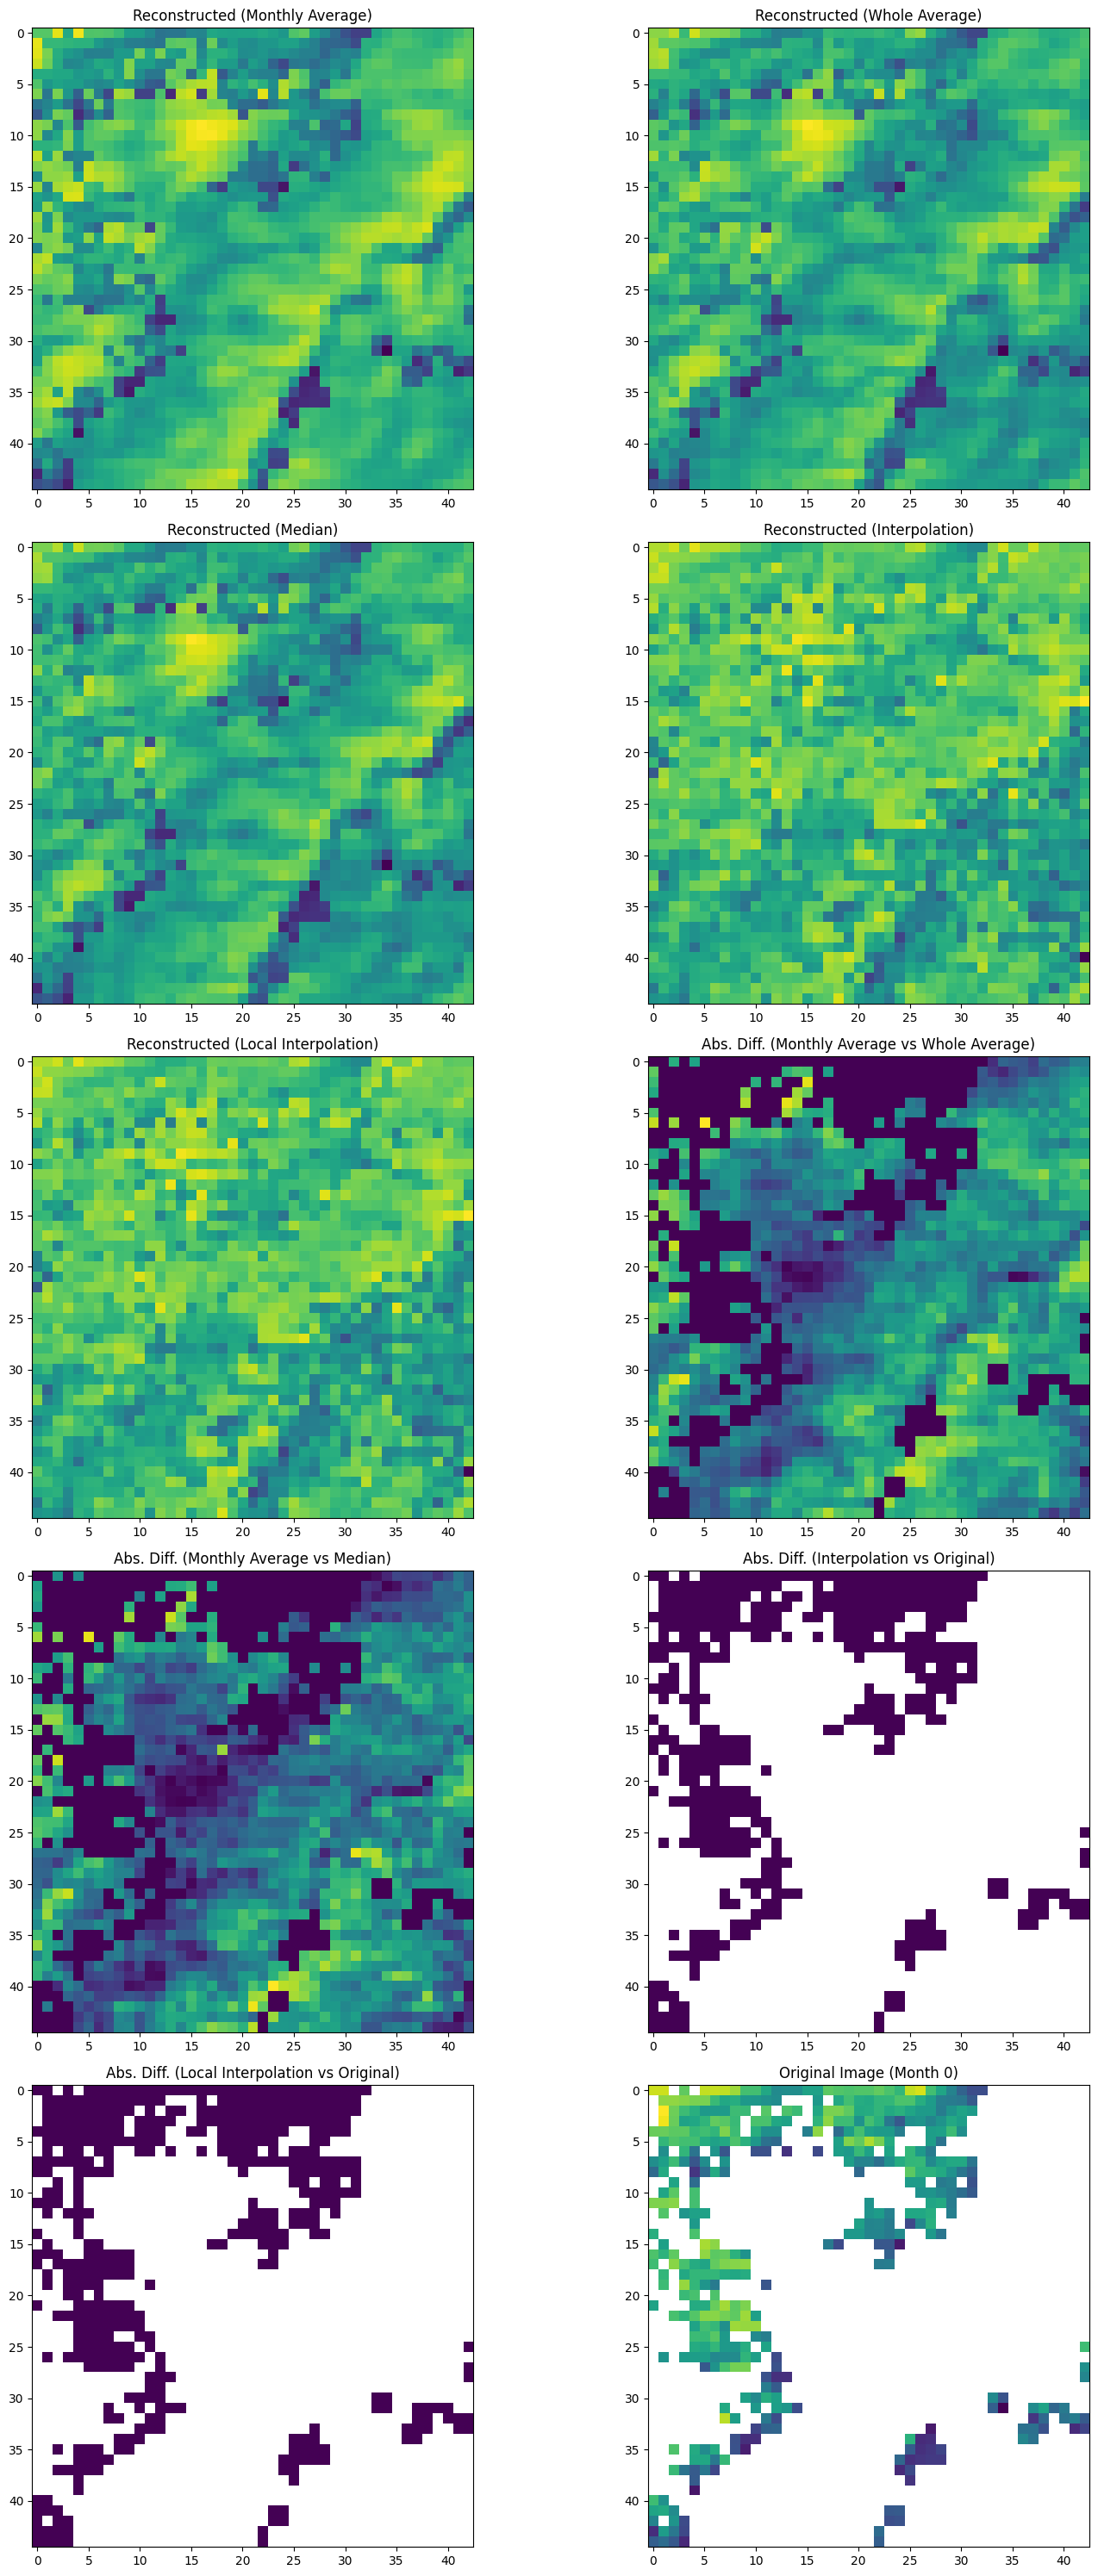

In [ ]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the TIFF image stack
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'
original_image_stack = tifffile.imread(image_path)

# Choose a specific month to visualize (e.g., the first month, assuming the months are indexed from 0)
selected_month = 0  # 0 corresponds to the first month

# Method 1: Fill NaN values by taking the average of other months
monthly_average_image = np.copy(original_image_stack[:, :, selected_month])
nan_indices_monthly_average = np.isnan(monthly_average_image)
average_values_monthly_average = np.nanmean(original_image_stack[:, :, :], axis=2)
monthly_average_image[nan_indices_monthly_average] = average_values_monthly_average[nan_indices_monthly_average]

# Method 2: Fill NaN values by taking the average of the same month over 22 years
whole_average_image = np.copy(original_image_stack)
nan_indices_whole_average = np.isnan(whole_average_image[:, :, selected_month])
average_values_whole_average = np.nanmean(original_image_stack[:, :, selected_month::12], axis=2, keepdims=True)
whole_average_image[:, :, selected_month][nan_indices_whole_average] = average_values_whole_average[nan_indices_whole_average, 0]

# Method 3: Fill NaN values by taking the median of the same month over 22 years
median_image = np.copy(original_image_stack)
nan_indices_median = np.isnan(median_image[:, :, selected_month])
median_values = np.nanmedian(original_image_stack[:, :, selected_month::12], axis=2, keepdims=True)
median_image[:, :, selected_month][nan_indices_median] = median_values[nan_indices_median, 0]

# Method 4: Reconstruct the image by interpolating NaN values
interpolation_image = np.copy(original_image_stack)
for i in range(original_image_stack.shape[0]):
    for j in range(original_image_stack.shape[1]):
        pixel_values = original_image_stack[i, j, :]
        non_nan_indices = ~np.isnan(pixel_values)
        if np.sum(non_nan_indices) > 1:
            x = np.arange(len(pixel_values))[non_nan_indices]
            y = pixel_values[non_nan_indices]
            f = interp1d(x, y, kind='linear', fill_value="extrapolate")  # Use interp1d for 1D interpolation
            interpolation_image[i, j, :] = f(np.arange(len(pixel_values)))

# Method 5: Local Interpolation
local_interpolation_image = np.copy(original_image_stack)
for i in range(original_image_stack.shape[0]):
    for j in range(original_image_stack.shape[1]):
        pixel_values = original_image_stack[i, j, :]
        non_nan_indices = ~np.isnan(pixel_values)
        if np.sum(non_nan_indices) > 1:
            x = np.arange(len(pixel_values))[non_nan_indices]
            y = pixel_values[non_nan_indices]
            f = interp1d(x, y, kind='linear', fill_value="extrapolate")  # Use interp1d for 1D interpolation
            local_interpolation_image[i, j, :] = f(np.arange(len(pixel_values)))

# Calculate the absolute differences between the methods
difference_image_monthly_average_whole_average = np.abs(monthly_average_image - whole_average_image[:, :, selected_month])
difference_image_monthly_average_median = np.abs(monthly_average_image - median_image[:, :, selected_month])
difference_image_interpolation_monthly_average = np.abs(interpolation_image[:, :, selected_month] - original_image_stack[:, :, selected_month])
difference_image_local_interpolation_monthly_average = np.abs(local_interpolation_image[:, :, selected_month] - original_image_stack[:, :, selected_month])

# Plotting the reconstructed images and their differences
fig, axes = plt.subplots(5, 2, figsize=(16, 30))

# Overlay VI values on the reconstructed image using Monthly Average
axes[0, 0].imshow(monthly_average_image, cmap='viridis')
axes[0, 0].set_title('Reconstructed (Monthly Average)')

# Overlay VI values on the reconstructed image using Whole Average
axes[0, 1].imshow(whole_average_image[:, :, selected_month], cmap='viridis')
axes[0, 1].set_title('Reconstructed (Whole Average)')

# Overlay VI values on the reconstructed image using Median
axes[1, 0].imshow(median_image[:, :, selected_month], cmap='viridis')
axes[1, 0].set_title('Reconstructed (Median)')

# Overlay VI values on the reconstructed image using Interpolation
axes[1, 1].imshow(interpolation_image[:, :, selected_month], cmap='viridis')
axes[1, 1].set_title('Reconstructed (Interpolation)')

# Overlay VI values on the reconstructed image using Local Interpolation
axes[2, 0].imshow(local_interpolation_image[:, :, selected_month], cmap='viridis')
axes[2, 0].set_title('Reconstructed (Local Interpolation)')

# Plot the absolute difference images
axes[2, 1].imshow(difference_image_monthly_average_whole_average, cmap='viridis')
axes[2, 1].set_title('Abs. Diff. (Monthly Average vs Whole Average)')

axes[3, 0].imshow(difference_image_monthly_average_median, cmap='viridis')
axes[3, 0].set_title('Abs. Diff. (Monthly Average vs Median)')

axes[3, 1].imshow(difference_image_interpolation_monthly_average, cmap='viridis')
axes[3, 1].set_title('Abs. Diff. (Interpolation vs Original)')

axes[4, 0].imshow(difference_image_local_interpolation_monthly_average, cmap='viridis')
axes[4, 0].set_title('Abs. Diff. (Local Interpolation vs Original)')

# Display the original image for reference
axes[4, 1].imshow(original_image_stack[:, :, selected_month], cmap='viridis')
axes[4, 1].set_title('Original Image (Month {})'.format(selected_month))

plt.tight_layout()
plt.show()

<ipython-input-15-bef7ebbf879b>:21: RuntimeWarning: Mean of empty slice
  average_values_whole_average = np.nanmean(image_stack[:, :, selected_month::12], axis=2, keepdims=True)


IndexError: ignored

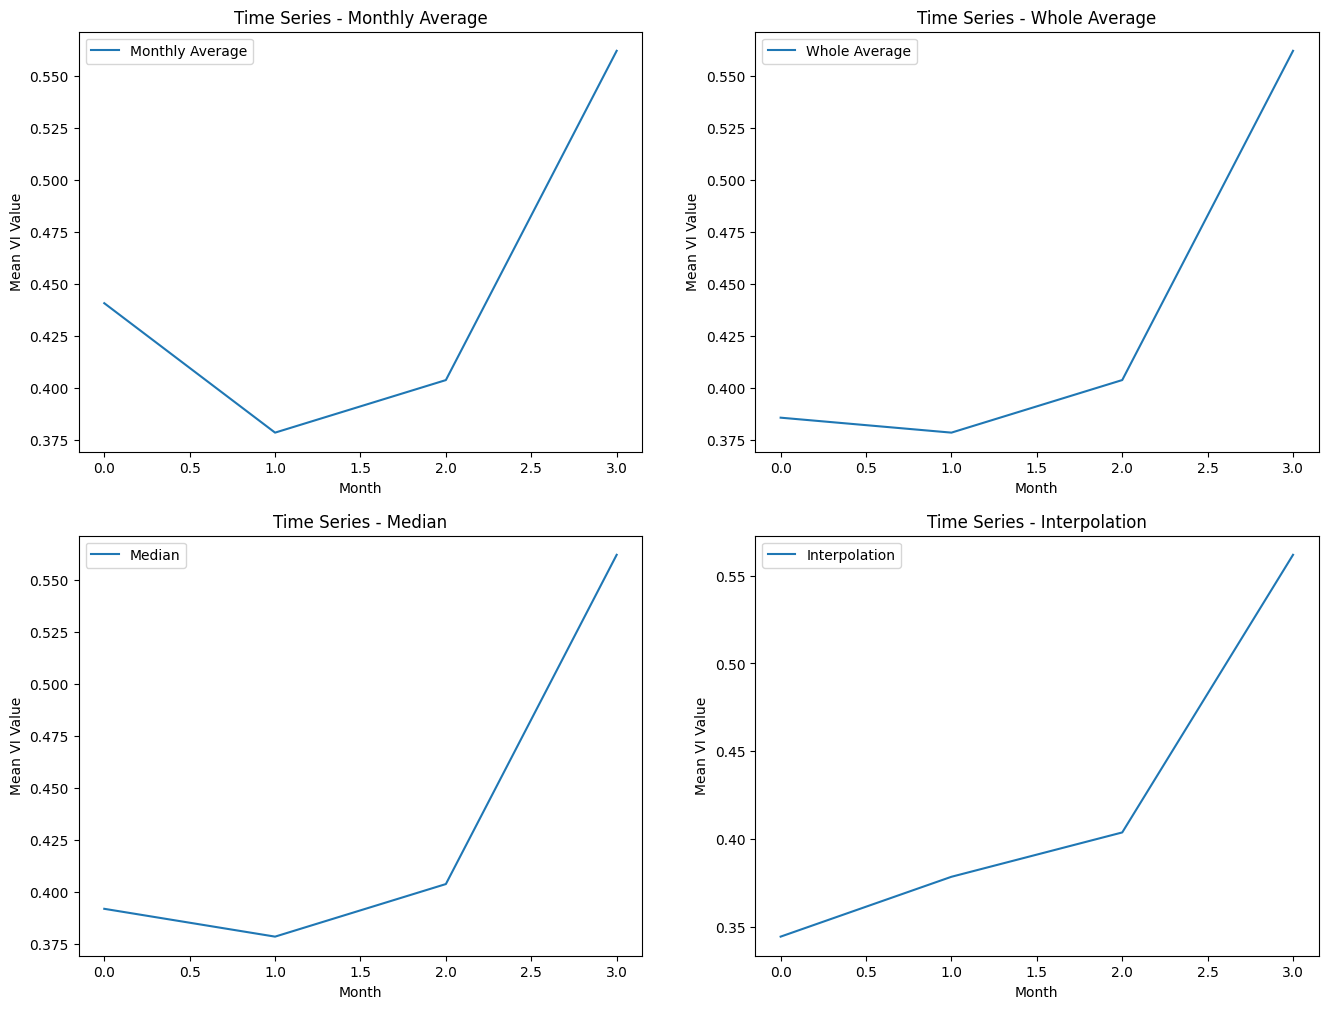

In [ ]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the TIFF image stack
image_path = '/content/MODMYD09cloud_EVImax_2000_2022_CLM.tiff'
original_image_stack = tifffile.imread(image_path)

# Function to apply reconstruction methods to a specific month
def reconstruct_image(image_stack, selected_month):
    # Method 1: Fill NaN values by taking the average of other months
    monthly_average_image = np.copy(image_stack[:, :, selected_month])
    nan_indices_monthly_average = np.isnan(monthly_average_image)
    average_values_monthly_average = np.nanmean(image_stack[:, :, :], axis=2)
    monthly_average_image[nan_indices_monthly_average] = average_values_monthly_average[nan_indices_monthly_average]

    # Method 2: Fill NaN values by taking the average of the same month over 22 years
    whole_average_image = np.copy(image_stack)
    nan_indices_whole_average = np.isnan(whole_average_image[:, :, selected_month])
    average_values_whole_average = np.nanmean(image_stack[:, :, selected_month::12], axis=2, keepdims=True)
    whole_average_image[:, :, selected_month][nan_indices_whole_average] = average_values_whole_average[nan_indices_whole_average, 0]

    # Method 3: Fill NaN values by taking the median of the same month over 22 years
    median_image = np.copy(image_stack)
    nan_indices_median = np.isnan(median_image[:, :, selected_month])
    median_values = np.nanmedian(image_stack[:, :, selected_month::12], axis=2, keepdims=True)
    median_image[:, :, selected_month][nan_indices_median] = median_values[nan_indices_median, 0]

    # Method 4: Reconstruct the image by interpolating NaN values
    interpolation_image = np.copy(image_stack)
    for i in range(image_stack.shape[0]):
        for j in range(image_stack.shape[1]):
            pixel_values = image_stack[i, j, :]
            non_nan_indices = ~np.isnan(pixel_values)
            if np.sum(non_nan_indices) > 1:
                x = np.arange(len(pixel_values))[non_nan_indices]
                y = pixel_values[non_nan_indices]
                f = interp1d(x, y, kind='linear', fill_value="extrapolate")  # Use interp1d for 1D interpolation
                interpolation_image[i, j, :] = f(np.arange(len(pixel_values)))

    # Method 5: Local Interpolation
    local_interpolation_image = np.copy(image_stack)
    for i in range(image_stack.shape[0]):
        for j in range(image_stack.shape[1]):
            pixel_values = image_stack[i, j, :]
            non_nan_indices = ~np.isnan(pixel_values)
            if np.sum(non_nan_indices) > 1:
                x = np.arange(len(pixel_values))[non_nan_indices]
                y = pixel_values[non_nan_indices]
                f = interp1d(x, y, kind='linear', fill_value="extrapolate")  # Use interp1d for 1D interpolation
                local_interpolation_image[i, j, :] = f(np.arange(len(pixel_values)))

    return monthly_average_image, whole_average_image[:, :, selected_month], median_image[:, :, selected_month], \
           interpolation_image[:, :, selected_month], local_interpolation_image[:, :, selected_month]

# Apply the reconstruction methods to all 264 images
reconstructed_images = []
for month in range(original_image_stack.shape[2]):
    reconstructed_images.append(reconstruct_image(original_image_stack, month))

# Plot the time series graph
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

labels = ['Monthly Average', 'Whole Average', 'Median', 'Interpolation', 'Local Interpolation']

for i, method_images in enumerate(zip(*reconstructed_images[:4])):  # Use only the first four methods
    method_name = labels[i]
    method_values = np.stack(method_images, axis=-1)

    # Calculate the mean VI value across all pixels for each method
    mean_method_values = np.nanmean(method_values, axis=(0, 1))

    # Plot the time series
    axes[i].plot(mean_method_values, label=method_name)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean VI Value')
    axes[i].set_title(f'Time Series - {method_name}')
    axes[i].legend()

plt.tight_layout()
plt.show()